<a href="https://colab.research.google.com/github/venkateshblks/DataScience-practice/blob/main/text_mining/Named_Entity_Recognition_Emotion_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Named Entity Recognition

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [50]:
import pandas
book=pd.read_csv("apple.txt",on_bad_lines='skip')
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [5]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [21]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [8]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [9]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Best ADJ
Laptop PROPN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [10]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['go', 'windows', 'term', 'love', 'battery', 'life', 'look', 'talking', 'app', 'store', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'version', 'use', 'office', 'are']


In [11]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,office,3
1,want,2
2,battery,2
3,store,2
4,have,2
5,install,2
6,version,2
7,file,2
8,play,2
9,60k,1


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

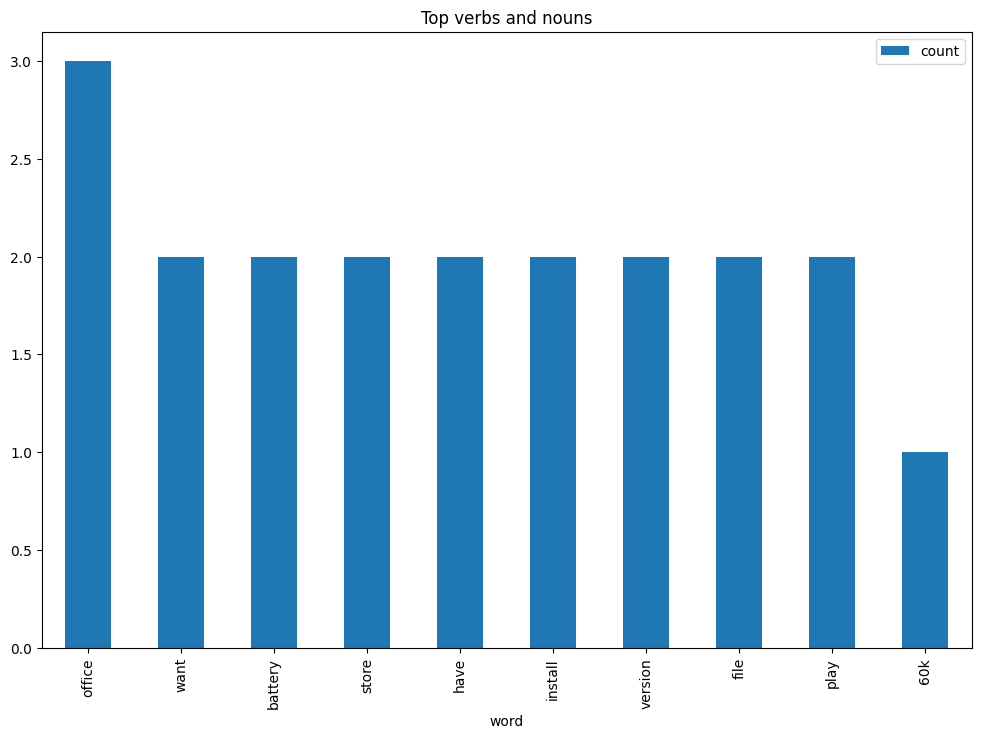

In [12]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [13]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [16]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("apple.txt",on_bad_lines='skip')
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [23]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Ove

In [24]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
183,You can get one of the best movie experiences ...
184,Overall I would it a 4.5/5.
185,"I got a great deal on this laptop, which I hav..."
186,I got it not only on discount but also was abl...


In [28]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
# affinity_scores

In [60]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score


In [73]:
def calculate_sent(text: str = None):
    sent_score_pos = 0
    sent_score_neg = 0
    sent_score_neu = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            x= sentiment_lexicon.get(word.lemma_, 0)
            if x>0:
              sent_score_pos+=x
            elif x<0:
              sent_score_neg+=x
            else:
              sent_score_neu+=x
        print(f'postive :{sent_score_pos}, Negative score {sent_score_neg} ,neutral score {sent_score_neu}')

    return sent_score_pos+sent_score_neg+sent_score_neu

In [78]:
k=nlp('worst amazing good')
for word in k:
  print(word.lemma_)
  print(sentiment_lexicon.get(word.lemma_, 0))
# sentence

worst
-3
amazing
4
good
3


In [75]:
# test that it works
# calculate_sentiment(text = 'amazing')
calculate_sent(text = ' worst and happy')

postive :3, Negative score -3 ,neutral score 0


0

In [76]:
calculate_sentiment(text = 'worst and happy')

0

In [84]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df.head()

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65


In [80]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     1
6     7
7    47
8    16
9    29
Name: word_count, dtype: int64

In [87]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
111,"The build is super strong, the operating syste...",5,10
46,Now my mac is perfectly fine : Got the Apple M...,5,27
47,Ships with macOS sierra but update is availabl...,6,86
65,I hope this comment can help to save somebody’...,6,10
104,The switch was inspired by the awesome reviews...,6,13
60,I use this for music production and it works a...,7,30
179,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,7,43
0,It's amazing..... battery last around 10 -12 h...,7,17
152,..So now I m working with the external keyboar...,17,113
87,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [85]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    188.000000
mean       0.930851
std        3.379793
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [88]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,!,0,1
6,"), all printers are not compatible (e.g.",0,7
8,you need to spend extra for an external CD wri...,0,16


In [90]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
87,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [97]:
sent_df['index']=range(0,len(sent_df))
sent_df.sentiment_value.value_counts()

sentiment_value
 0     62
 3     24
 2     19
-1     16
-2     14
 5     13
 1     10
-3      9
 4      6
 6      3
 7      3
-5      2
-4      2
-11     1
 24     1
-6      1
-8      1
 17     1
Name: count, dtype: int64

In [100]:
print(sent_df.shape)
sent_df.head()

(188, 4)


,sentence,sentiment_value,word_count,index
0,It's amazing..... battery last around 10 -12 h...,7,17,0
1,Got it in 50k in Diwali sale.,0,7,1
2,Technically good laptop.Good News.luxury produ...,5,31,2
3,Terrific sense of possession & pride.Bad News.,4,7,3
4,Problems will be there if you are switching fr...,-11,65,4


<ipython-input-95-6e3dcf195c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

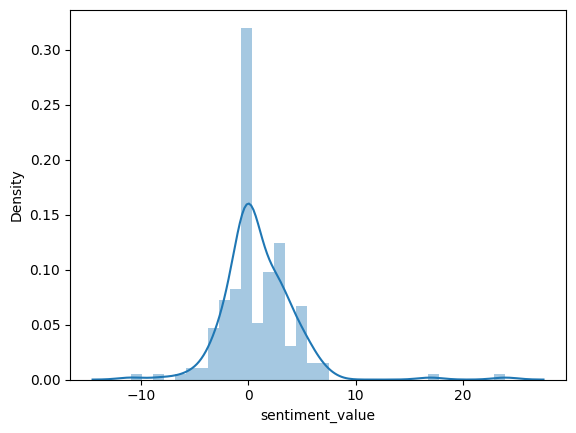

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

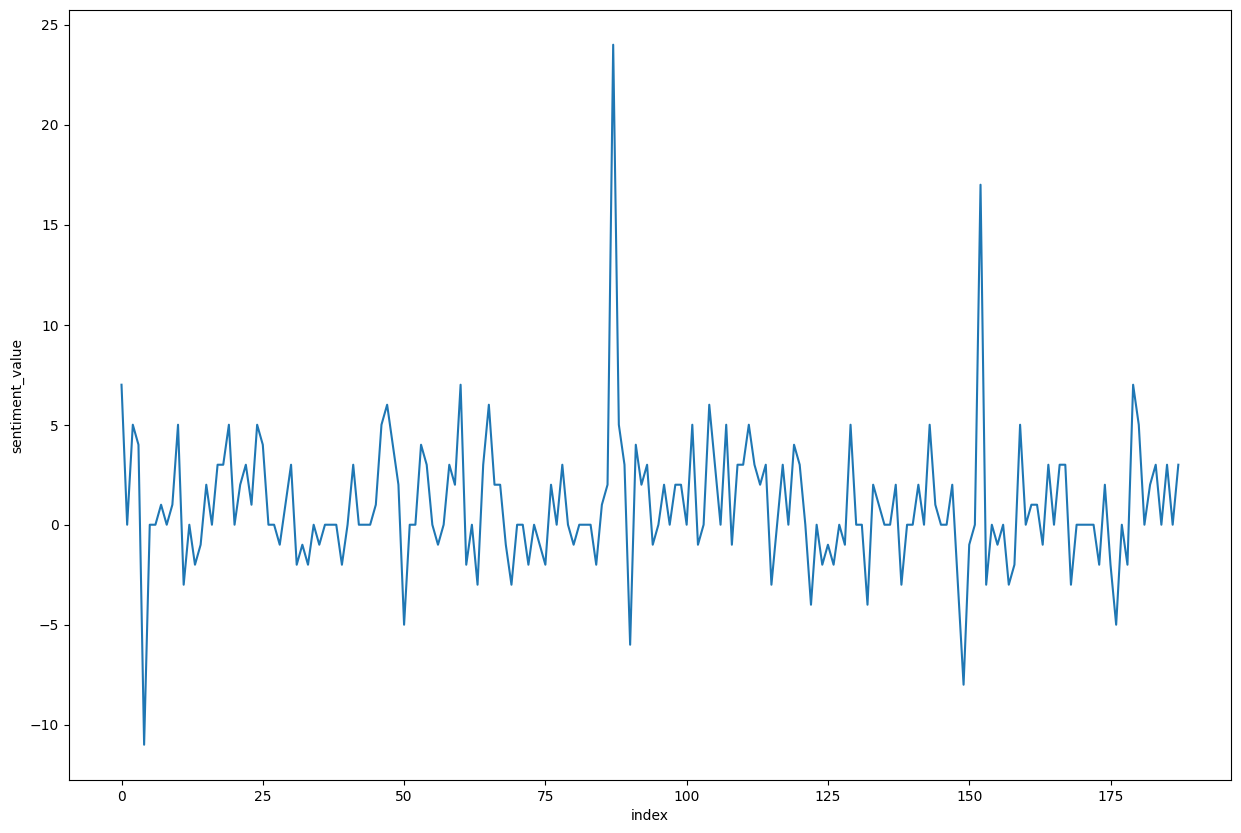

In [98]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

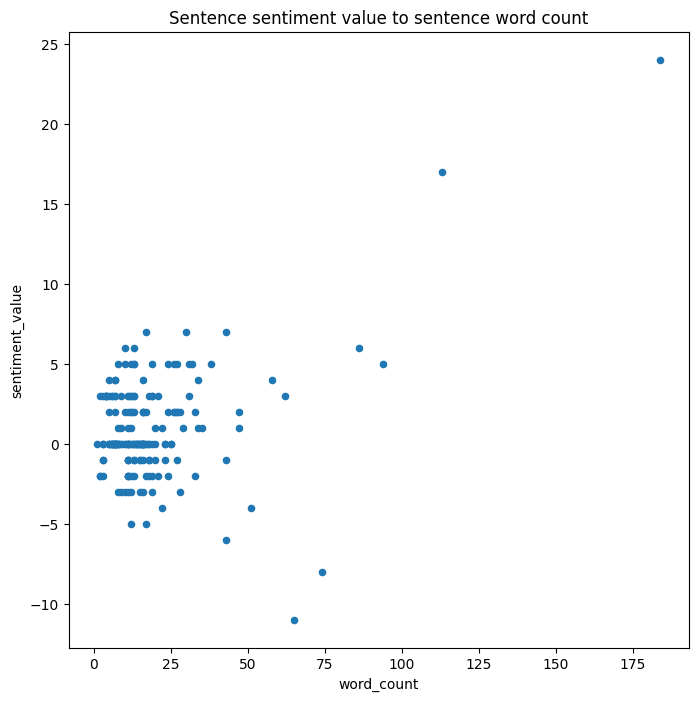

In [101]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [103]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [106]:
def analyze_emotion(text):
  sia=SentimentIntensityAnalyzer()
  sentiment_score=sia.polarity_scores(text)
  print(sentiment_score)
analyze_emotion('I Love python')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}


In [107]:
!pip install NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=0bcb36eb4bc034127413823f58aefc6c51644d2930499ed960e59a669d99e47d
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built NRCLex


In [108]:
from nrclex import NRCLex

In [109]:
text=book.x[2]
text

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk\n            "

In [111]:
s=NRCLex(text)
s.affect_dict

{'love': ['joy', 'positive'],
 'battery': ['anger', 'negative'],
 'sleek': ['positive'],
 'store': ['anticipation', 'positive'],
 'install': ['anticipation'],
 'good': ['anticipation', 'joy', 'positive', 'surprise', 'trust'],
 'convert': ['positive'],
 'numbers': ['positive'],
 'mobile': ['anticipation']}

In [114]:
s.affect_frequencies

{'fear': 0.0,
 'anger': 0.09523809523809523,
 'anticip': 0.0,
 'trust': 0.047619047619047616,
 'surprise': 0.047619047619047616,
 'positive': 0.3333333333333333,
 'negative': 0.09523809523809523,
 'sadness': 0.0,
 'disgust': 0.0,
 'joy': 0.09523809523809523,
 'anticipation': 0.2857142857142857}

In [116]:
t=' '.join(book.x)
# t

In [118]:
sentiment=NRCLex(t)
sentiment.affect_frequencies

{'fear': 0.048818897637795275,
 'anger': 0.048818897637795275,
 'anticip': 0.0,
 'trust': 0.15275590551181104,
 'surprise': 0.06929133858267716,
 'positive': 0.262992125984252,
 'negative': 0.10236220472440945,
 'sadness': 0.05826771653543307,
 'disgust': 0.031496062992125984,
 'joy': 0.09291338582677165,
 'anticipation': 0.13228346456692913}